In [46]:

from data_processing.resize_images import resize_image_with_annotations

## Image Preprocessing: Convert RGB to Tensor

In [47]:

resize = resize_image_with_annotations(image_path="data/images/maksssksksss0.png",xml_path="data/annotations/maksssksksss0.xml",method = 'resize')
pad_resize = resize_image_with_annotations(image_path="data/images/maksssksksss0.png",xml_path="data/annotations/maksssksksss0.xml",method = 'pad_resize')
resize_pad = resize_image_with_annotations(image_path="data/images/maksssksksss0.png",xml_path="data/annotations/maksssksksss0.xml",method = 'resize_pad')

2025-02-16 12:56:56,221 - INFO - data/annotations/maksssksksss0.xml : Sucessfully extracted size attributes of image!. Height:366, width:512, depth:3
2025-02-16 12:56:56,222 - INFO - Person without_mask and Bounding box at (79, 105) to (109, 142)
2025-02-16 12:56:56,222 - INFO - Person with_mask and Bounding box at (185, 100) to (226, 144)
2025-02-16 12:56:56,224 - INFO - Person without_mask and Bounding box at (325, 90) to (360, 141)
2025-02-16 12:56:56,230 - INFO - ✅ Processed: data/images/maksssksksss0.png, New Size: (224, 224)
2025-02-16 12:56:56,230 - INFO - 🔄 Rescaled Bounding Box for without_mask: (34, 64) to (47, 86)
2025-02-16 12:56:56,231 - INFO - 🔄 Rescaled Bounding Box for with_mask: (80, 61) to (98, 88)
2025-02-16 12:56:56,231 - INFO - 🔄 Rescaled Bounding Box for without_mask: (142, 55) to (157, 86)
2025-02-16 12:56:56,233 - INFO - data/annotations/maksssksksss0.xml : Sucessfully extracted size attributes of image!. Height:366, width:512, depth:3
2025-02-16 12:56:56,234 - 

In [48]:
# Shape of tensor
resize[0].shape

torch.Size([3, 224, 224])

# Resize image

[{'label': 'without_mask', 'coordinates': {'xmin': 34, 'ymin': 64, 'xmax': 47, 'ymax': 86}}, {'label': 'with_mask', 'coordinates': {'xmin': 80, 'ymin': 61, 'xmax': 98, 'ymax': 88}}, {'label': 'without_mask', 'coordinates': {'xmin': 142, 'ymin': 55, 'xmax': 157, 'ymax': 86}}]


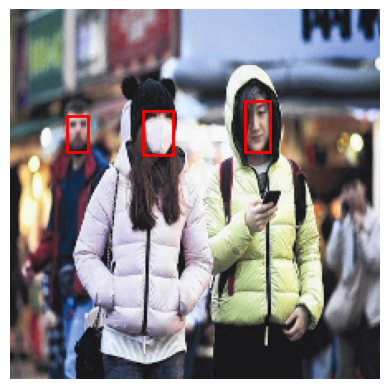

In [49]:
import matplotlib.pyplot as plt
import torch
import matplotlib.patches as patches

def visualize_image(image_boundingbox):
    # Step 1 convert tensor to format that can shown as image(using matplotlib)
    image_tensor = image_boundingbox[0]
    image_tensor = image_tensor.permute(1,2,0)#Convert tensor (C,H,W) -> (H,W,C)
    image_tensor = image_tensor.numpy() #Matplot lib takes numpy input
    fig, ax = plt.subplots(1)
    ax.imshow(image_tensor)

    #Step 2 put bounding boxes on image
    annotations = image_boundingbox[1]['annotations']
    print(annotations)
    for bbox in annotations:
        coordinates = bbox['coordinates']
        x_min = coordinates['xmin']
        y_min = coordinates['ymin']
        x_max = coordinates['xmax']
        y_max = coordinates['ymax']

        width = x_max - x_min
        height = y_max - y_min

        box = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none') #Creates a box
        ax.add_patch(box)


    plt.axis("off")  
    plt.show()


   


visualize_image(resize)


# Pad and Resize

[{'label': 'without_mask', 'coordinates': {'xmin': 34, 'ymin': 45, 'xmax': 47, 'ymax': 62}}, {'label': 'with_mask', 'coordinates': {'xmin': 80, 'ymin': 43, 'xmax': 98, 'ymax': 63}}, {'label': 'without_mask', 'coordinates': {'xmin': 142, 'ymin': 39, 'xmax': 157, 'ymax': 61}}]


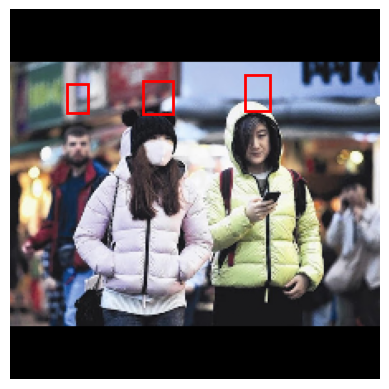

In [50]:
visualize_image(pad_resize)


# Resize and pad

[{'label': 'without_mask', 'coordinates': {'xmin': 34, 'ymin': 45, 'xmax': 47, 'ymax': 62}}, {'label': 'with_mask', 'coordinates': {'xmin': 80, 'ymin': 43, 'xmax': 98, 'ymax': 63}}, {'label': 'without_mask', 'coordinates': {'xmin': 142, 'ymin': 39, 'xmax': 157, 'ymax': 61}}]


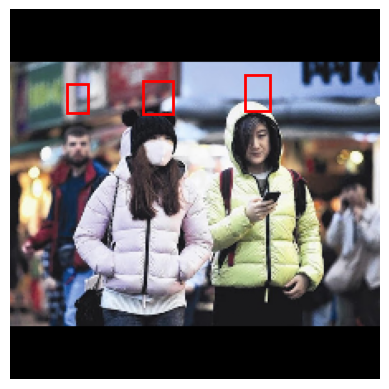

In [51]:
visualize_image(resize_pad)